<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#군집화-KMeans" data-toc-modified-id="군집화-KMeans-1">군집화-KMeans</a></span><ul class="toc-item"><li><span><a href="#개요" data-toc-modified-id="개요-1.1">개요</a></span></li><li><span><a href="#목표" data-toc-modified-id="목표-1.2">목표</a></span></li><li><span><a href="#K-Means-Algorithm" data-toc-modified-id="K-Means-Algorithm-1.3">K-Means Algorithm</a></span></li><li><span><a href="#Expectation-and-Maximization" data-toc-modified-id="Expectation-and-Maximization-1.4">Expectation and Maximization</a></span></li></ul></li><li><span><a href="#Example" data-toc-modified-id="Example-2">Example</a></span><ul class="toc-item"><li><span><a href="#data-준비" data-toc-modified-id="data-준비-2.1">data 준비</a></span></li><li><span><a href="#EM-(Expectation-and-Maximization)" data-toc-modified-id="EM-(Expectation-and-Maximization)-2.2">EM (Expectation and Maximization)</a></span></li><li><span><a href="#반복-가능한-개선된-EM" data-toc-modified-id="반복-가능한-개선된-EM-2.3">반복 가능한 개선된 EM</a></span></li></ul></li><li><span><a href="#문서-클러스터링-=&gt;-토픽-추출" data-toc-modified-id="문서-클러스터링-=>-토픽-추출-3">문서 클러스터링 =&gt; 토픽 추출</a></span><ul class="toc-item"><li><span><a href="#euclidean,-cosine-함수-수정-(여러-문서-계산)" data-toc-modified-id="euclidean,-cosine-함수-수정-(여러-문서-계산)-3.1">euclidean, cosine 함수 수정 (여러 문서 계산)</a></span></li><li><span><a href="#DTM,-TDM,-TWM" data-toc-modified-id="DTM,-TDM,-TWM-3.2">DTM, TDM, TWM</a></span></li><li><span><a href="#어휘-클러스터" data-toc-modified-id="어휘-클러스터-3.3">어휘 클러스터</a></span></li><li><span><a href="#시각화-(WordCloud)" data-toc-modified-id="시각화-(WordCloud)-3.4">시각화 (WordCloud)</a></span></li></ul></li></ul></div>

## 군집화-KMeans

- https://ko.wikipedia.org/wiki/K-평균_알고리즘

### 개요

k-평균 클러스터링 알고리즘은 클러스터링 방법 중 분할법에 속한다. 

분할법은 주어진 데이터를 여러 파티션 (그룹) 으로 나누는 방법이다. 

예를 들어 n개의 데이터 오브젝트를 입력받았다고 가정하자. <br>
이 때 분할법은 입력 데이터를 n보다 작거나 같은 k개의 그룹으로 나누는데, 이 때 각 군집은 클러스터를 형성하게 된다. <br>
다시 말해, 데이터를 한 개 이상의 데이터 오브젝트로 구성된 k개의 그룹으로 나누는 것이다. 

이 때 그룹을 나누는 과정은 거리 기반의 그룹간 비유사도 (dissimilarity) 와 같은 비용 함수 (cost function) 을 최소화하는 방식으로 이루어지며, <br>
이 과정에서 같은 그룹 내 데이터 오브젝트 끼리의 유사도는 증가하고, <br>
다른 그룹에 있는 데이터 오브젝트와의 유사도는 감소하게 된다. 

k-평균 알고리즘은 각 그룹의 중심(centroid)과 그룹 내의 데이터 오브젝트와의 거리의 제곱합을 비용 함수로 정하고, <br>
이 함수값을 최소화하는 방향으로 각 데이터 오브젝트의 소속 그룹을 업데이트 해 줌으로써 클러스터링을 수행하게 된다.

### 목표

n개의 d-차원 데이터 오브젝트 $(x1, x2, …, xn)$ 집합이 주어졌을 때, <br>
k-평균 알고리즘은 n개의 데이터 오브젝트들을 각 집합 내 오브젝트 간 응집도를 최대로 하는 $k(\leq n)$ 개의 집합 $S = \{S1, S2, …, Sk\}$ 으로 분할한다.

다시 말해, $\mu_i$가 집합 $S_i$의 중심점이라 할 때,

${\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}\sum _{\mathbf {x} \in S_{i}}\left\|\mathbf {x} -{\boldsymbol {\mu }}_{i}\right\|^{2}$

각 집합별 중심점~집합 내 오브젝트간 거리의 제곱합을 최소로 하는 집합 S를 찾는 것이 이 알고리즘의 목표다. 

이 목적 함수의 전역 최솟값 (global minimum) 을 찾는 것은 NP-난해 문제이므로, <br>
언덕 오르기 (hill climbing) 방식으로 목적 함수의 오차를 줄여나가며 <br>
지역 최솟값 (local minimum) 을 발견했을 때 알고리즘을 종료함으로써 근사 최적해를 구한다.

### K-Means Algorithm

![KMeans](./images/KMeans.png)

### Expectation and Maximization

![KMeans_EM](./images/KMeans_EM.png)

## Example

### data 준비

In [1]:
# K-Means, K=Random, Centroid=Random, Data=Random
from random import randrange
from random import sample
from random import seed

# seed(42)

# instance or examples
data = list()    # (x, y) : x는 단어 index, y는 단어 중요도(weight)

# centroids
cluster = list()

K = 3
N = 100

for i in range(N):
    data.append((randrange(0, 100), randrange(0, 100)))
    
# for i in range(K):
#     cluster.append((randrange(0, 100), randrange(0, 100)))

# cluster를 random하게 만들면 dataset이 null이 될 수 있음 => data 중에서 K개 sample 선택하는 방식 선택
cluster = sample(data, K)

In [2]:
print(data)

[(1, 91), (32, 89), (50, 70), (78, 85), (7, 36), (50, 46), (40, 31), (90, 91), (63, 0), (3, 3), (22, 78), (92, 16), (50, 87), (44, 71), (20, 0), (31, 88), (87, 46), (36, 36), (51, 91), (15, 47), (46, 34), (77, 69), (95, 97), (96, 80), (49, 23), (32, 52), (32, 64), (90, 68), (91, 57), (42, 12), (22, 51), (46, 65), (27, 33), (12, 19), (28, 21), (14, 88), (50, 72), (21, 13), (42, 25), (14, 23), (16, 1), (32, 6), (31, 52), (53, 46), (98, 38), (66, 9), (74, 77), (22, 61), (46, 88), (59, 33), (16, 43), (89, 15), (51, 78), (67, 57), (52, 92), (42, 28), (79, 74), (54, 38), (31, 16), (27, 70), (16, 18), (41, 98), (57, 76), (21, 95), (70, 92), (4, 30), (33, 34), (51, 16), (50, 37), (17, 54), (97, 57), (95, 7), (90, 33), (41, 81), (20, 4), (61, 20), (67, 30), (22, 82), (59, 10), (21, 32), (27, 85), (90, 43), (36, 32), (47, 64), (84, 10), (98, 90), (20, 20), (28, 95), (47, 98), (52, 26), (39, 15), (65, 25), (98, 13), (79, 51), (53, 26), (88, 55), (53, 34), (45, 14), (6, 65), (60, 85)]


In [3]:
cluster

[(21, 13), (21, 95), (41, 81)]

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
colormap = ("r", "g", "b", "k")

for i in range(N):
    plt.scatter(data[i][0], data[i][1], alpha=0.3, color=colormap[-1])
    
for i in range(K):
    plt.scatter(cluster[i][0], cluster[i][1], color=colormap[i])

### EM (Expectation and Maximization)

In [5]:
# Similarity = Euclidean Distance
from math import sqrt

def euclidean(x1, x2):
    return sqrt((x1[0]-x2[0])**2 + (x1[1]-x2[1])**2)

In [6]:
def cosine(x1, x2):
    return (x1[0]*x2[0] + x1[1]*x2[1]) / (euclidean(x1, (0,0)) * euclidean(x2, (0, 0)))

In [7]:
def expectation(data, clusters, k=3, cos=True):
    distance = list()

    for i in range(k):
        distance.append(euclidean(data, clusters[i]))
        
    return distance.index(min(distance))

In [8]:
def maximization(data):   # 여러개의 문서를 처리할 수 있도록 수정 필요
    N = len(data)
    sumX = 0
    sumY = 0
    
    for _ in data:
        sumX += _[0]
        sumY += _[1]
        
    return (sumX/N, sumY/N)    # X, Y 좌표의 평균

In [9]:
def sse(data, centroid):   # sum squared error
    _sum = 0.0
    
    for _ in data:
        _sum += euclidean(_, centroid)
        
    return _sum

In [10]:
cluster   # EM 수행 전

[(21, 13), (21, 95), (41, 81)]

In [11]:
# Randomly K=3, N=100, Centroids=Clusters => rnk
iterCount = 10
sseList = list()

for _ in range(iterCount):
    rnk = list(list(0 for _ in range(K)) for _ in range(N))

    for i in range(N):
        k = expectation(data[i], cluster)
        rnk[i][k] = 1

    _sum = 0.0
    for i in range(K):
        dataset = [data[j] for j in range(N) if rnk[j][i]]        # cluster를 random하게 만들면 dataset이 null이 될 수 있음 => data 중에서 K개 sample 선택
        _sum += sse(dataset, cluster[i])
        cluster[i] = maximization(dataset)
        
    sseList.append(_sum)

In [12]:
cluster    # EM 수행 후

[(37.02272727272727, 23.75),
 (36.06060606060606, 77.81818181818181),
 (87.91304347826087, 53.43478260869565)]

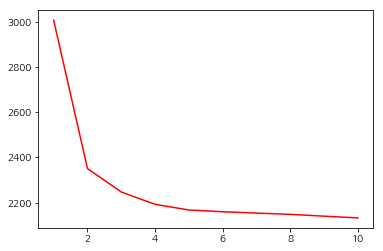

In [13]:
plt.plot(range(1, iterCount+1), sseList, "r-")

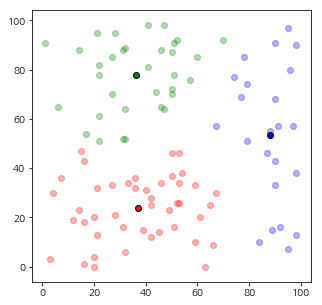

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
colormap = ("r", "g", "b", "k")

for i in range(N):
    plt.scatter(data[i][0], data[i][1], alpha=0.3, color=colormap[rnk[i].index(max(rnk[i]))])
    
for i in range(K):
    plt.scatter(cluster[i][0], cluster[i][1], color=colormap[i], edgecolors=colormap[-1])

### 반복 가능한 개선된 EM

In [15]:
# 2개 이상을 처리하는 expectation
def expectation(data, clusters, k=3, cos=True):
    distance = list()
    metric = cosine if cos else euclidean
    rvalue = max if cos else min
    
    distance = list()

    for i in range(k):
        distance.append(metric(data, clusters[i]))
        
    return distance.index(rvalue(distance))

In [16]:
# 두개 이상을 처리하는 maximization
def maximization(data):   # 여러개의 문서를 처리할 수 있도록 수정 필요
    N = len(data)
    _sum = list(0 for _ in range(len(data[0])))
    
    for _ in data:
        for i in range(len(_)):
            _sum[i] += _[i]

    return tuple(_/N for _ in _sum)

Iteration: 1 / SSE:4257.450187094984


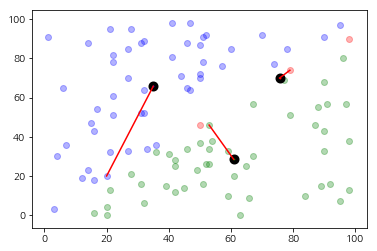

Iteration: 2 / SSE:2973.4717282108454


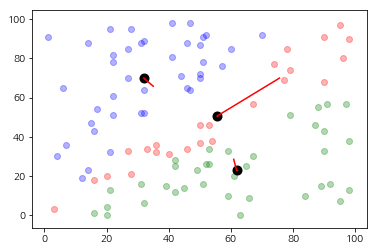

Iteration: 3 / SSE:2770.4864136788556


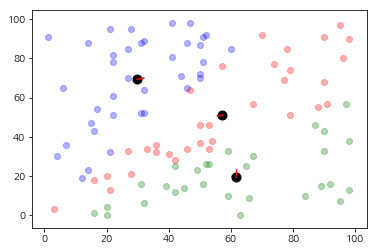

Iteration: 4 / SSE:2766.0902708984486


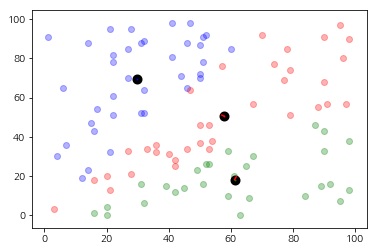

Iteration: 5 / SSE:2767.770210623582


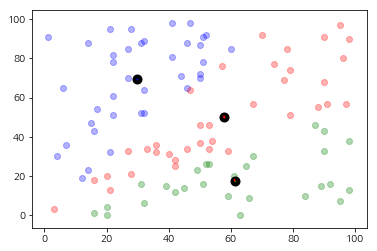

Iteration: 6 / SSE:2766.835284346155


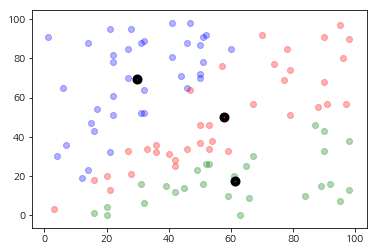

In [17]:
# Randomly K=3, N=100, Centroids=Clusters => rnk
iterCount = 6
sseList = list()

cluster = sample(data, K)    # 실행 할 때 마다 초기화 필요

for _ in range(iterCount):
    rnk = list(list(0 for _ in range(K)) for _ in range(N))

    for i in range(N):
        k = expectation(data[i], cluster)
        rnk[i][k] = 1

    _sum = 0.0
    oldCluster = list()
    
    for i in range(K):
        dataset = [data[j] for j in range(N) if rnk[j][i]]
        _sum += sse(dataset, cluster[i])
        oldCluster.append(cluster[i])
        cluster[i] = maximization(dataset)
        
    print("Iteration: {0} / SSE:{1}".format(_+1, _sum))

    for i in range(N):
        plt.scatter(data[i][0], data[i][1], alpha=0.3, color=colormap[rnk[i].index(max(rnk[i]))])

    for i in range(K):
        plt.plot((oldCluster[i][0], cluster[i][0]), (oldCluster[i][1], cluster[i][1]), "r-")
        plt.scatter(cluster[i][0], cluster[i][1], color=colormap[i], linewidths=4, edgecolors=colormap[-1])
    
    plt.show()
    
    sseList.append(_sum)

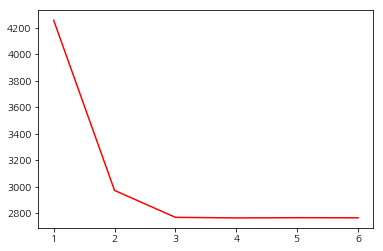

In [18]:
plt.plot(range(1, iterCount+1), sseList, "r-")

Iteration: 2 / SSE:2953.5573920771217


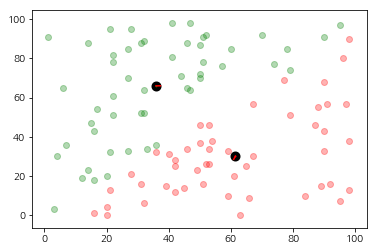

Iteration: 3 / SSE:2766.1253344638594


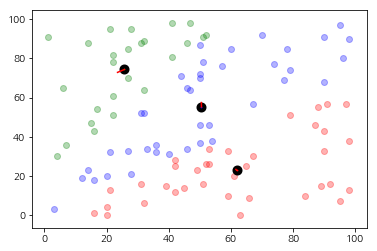

Iteration: 4 / SSE:2640.6532680045384


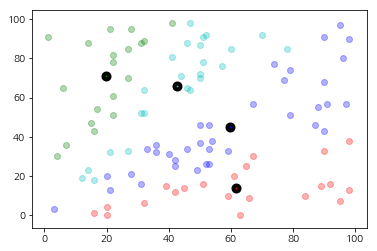

Iteration: 5 / SSE:2634.2658911963285


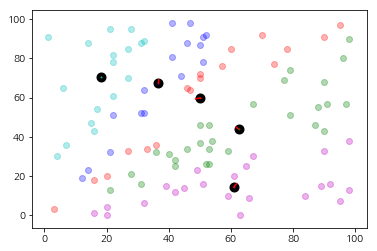

Iteration: 6 / SSE:2538.785382280003


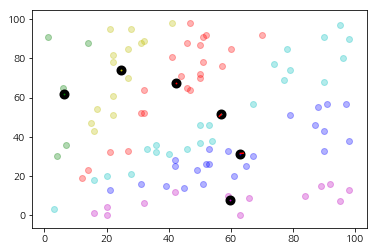

Iteration: 7 / SSE:2512.2866132192544


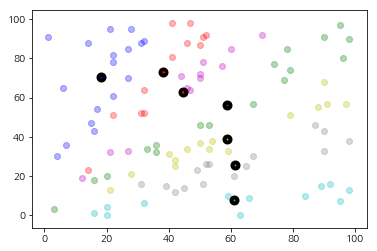

Iteration: 8 / SSE:2530.031298816869


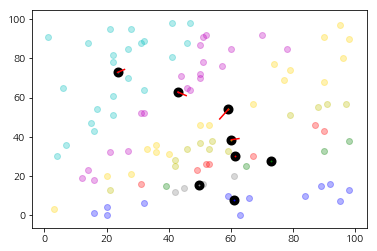

Iteration: 9 / SSE:2481.6882060254466


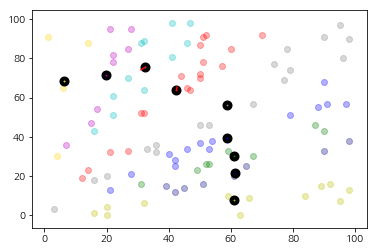

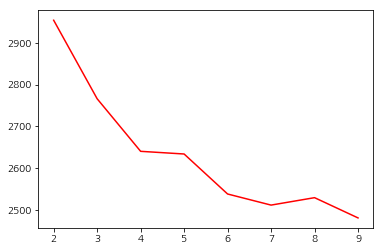

In [19]:
# Randomly K=3, N=100, Centroids=Clusters => rnk
iterCount = 6
sseList = list()

# https://matplotlib.org/examples/color/named_colors.html
colormap = ("r", "g", "b", "c", "m", "y", "gray", "gold", "navy", "ivory", "violet", "pink", "brown", "k")

for k in range(2, 10):
    cluster = sample(data, k)    # 실행 할 때 마다 초기화 필요

    for _ in range(iterCount):
        rnk = list(list(0 for _ in range(k)) for _ in range(N))

        for i in range(N):
            j = expectation(data[i], cluster, k=k, cos=True)
            rnk[i][j] = 1

        _sum = 0.0
        oldCluster = list()

        for i in range(k):
            dataset = [data[j] for j in range(N) if rnk[j][i]]
            _sum += sse(dataset, cluster[i])
            oldCluster.append(cluster[i])
            cluster[i] = maximization(dataset)

    sseList.append(_sum)
        
    print("Iteration: {0} / SSE:{1}".format(k, _sum))

    for i in range(N):
        plt.scatter(data[i][0], data[i][1], alpha=0.3, color=colormap[rnk[i].index(max(rnk[i]))])

    for i in range(k):
        plt.plot((oldCluster[i][0], cluster[i][0]), (oldCluster[i][1], cluster[i][1]), "r-")
        plt.scatter(cluster[i][0], cluster[i][1], color=colormap[i], linewidths=4, edgecolors=colormap[-1])

    plt.show()

plt.plot(range(2, 10), sseList, "r-")
plt.show()

## 문서 클러스터링 => 토픽 추출

- 단어의 벡터 스페이스에서 클러스터별로 어떤 단어가 중요한지를 비교

### euclidean, cosine 함수 수정 (여러 문서 계산)

In [20]:
# Similarity = Euclidean Distance
from math import sqrt

def euclidean(x1, x2):
    _sum = 0.0
    for i in range(len(x1)):
        _sum += (x1[i] - x2[i]) ** 2
        
    return sqrt(_sum)

In [21]:
def cosine(x1, x2):
    _sum = 0.0
    x1_length = 0.0
    x2_length = 0.0
    
    for i in range(len(x1)):
        _sum += x1[i]*x2[i]
    
    return _sum / (euclidean(x1, [0 for _ in range(len(x1))]) * euclidean(x2, [0 for _ in range(len(x1))]))

### DTM, TDM, TWM

In [22]:
documents = [
    "This little kitty came to play when I was eating at a restaurant.",
    "Merley has the best squooshy kitten belly.",
    "Google Translate app is incredible.",
    "If you open 100 tab in google you get a smiley face.",
    "Best cat photo I've ever taken.",
    "Climbing ninja cat.",
    "Impressed with google map feedback.",
    "Key promoter extension for Google Chrome."
]

In [23]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import re
from math import log

from collections import defaultdict

In [24]:
# K(Documnet):V(Term:Feeq)
DTM = defaultdict(lambda : defaultdict(int))

# K(Term);V(Doemnent:Freq)
TDM = defaultdict(lambda : defaultdict(int))

# K(Term):V(Document:Weight)
TWM = defaultdict(lambda : defaultdict(float))

stopList = stopwords.words("english")

for idx, d in enumerate(documents):   # collection
    for term in word_tokenize(d.lower()):   # 소문자로 변환된, 구도점도 구분된, 어절 리스트
        if term not in stopList and not re.match(r"{0}".format(re.escape(punctuation)), term):    # 불용어 제거
            DTM[idx][term] += 1
            
for doc, termList in DTM.items():
    for term, freq in termList.items():
        TDM[term][doc] += 1

N = len(DTM)   # 전체 document 수
V = len(TDM)   # term의 전체 차원 수(vocabulary 수)

for term, docList in TDM.items():
    df = len(docList)
    for doc, freq in docList.items():
        maxtf = max(DTM[doc].values())
        # TF: f / maxF, IDF: log(N/df)
        TWM[term][doc] = (freq/maxtf) * (log(N/df))

In [25]:
len(DTM), len(TDM), len(TWM)

(8, 36, 36)

In [26]:
K = 2

doc = [(0) * V] * N
d1 = (0, 0)
d2 = (1, 1)
d3 = (3, 3)

cluster = list()
docVector = list(list(0.0 for _ in range(V)) for _ in range(N))

for i in range(N):
    for j, t in enumerate(TDM.keys()):
        docVector[i][j] = TWM[t][i]
        # 행: 문서 index
        # 열: 단어 index

### 어휘 클러스터

In [27]:
from random import sample

In [28]:
cluster = sample(docVector, K)
len(cluster), len(docVector[0])

(2, 36)

In [29]:
sseList = list()

for _ in range(10):
    rnk = list(list(0.0 for _ in range(K)) for _ in range(N))

    for i, d in enumerate(docVector):
        c = expectation(d, clusters=cluster, k=K, cos=False)
        rnk[i][c] = 1
        
    _sum = 0.0
    
    for j, c in enumerate(cluster):
        dataset = [docVector[i] for i in range(N) if rnk[i][j]]
        _sum += sse(dataset, c)
        cluster[j] = maximization(dataset)
        
    sseList.append(_sum)

In [30]:
sseList

[33.8931347928215,
 27.359181764643225,
 27.359181764643225,
 27.359181764643225,
 27.359181764643225,
 27.359181764643225,
 27.359181764643225,
 27.359181764643225,
 27.359181764643225,
 27.359181764643225]

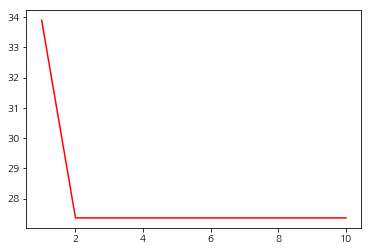

In [31]:
plt.plot(range(1, 11), sseList, "r-")

### 시각화 (WordCloud)

In [32]:
clusterDataset = list()

for j, c in enumerate(cluster):
    dataset = [i for i in range(N) if rnk[i][j]]
    clusterDataset.append(dataset)

In [33]:
len(clusterDataset), clusterDataset[0]

(2, [0, 2, 3, 4, 5, 6, 7])

In [34]:
voca = list(TWM.keys())
topic = list()

for c in cluster:
    wordList = defaultdict(float)
    
    for i, w in enumerate(c):
        wordList[voca[i]] = w
        
    topic.append(dict(sorted(wordList.items(), key=lambda x: x[1], reverse=True)[:5]))    # {word, value}
    print(sorted(wordList, key=wordList.get, reverse=True)[:5])      # [word]

['google', 'cat', 'little', 'kitty', 'came']
['merley', 'squooshy', 'kitten', 'belly', 'best']


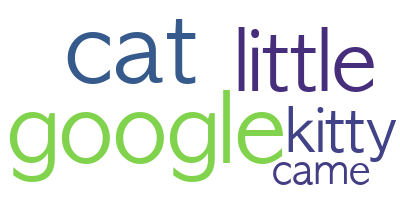

In [35]:
from wordcloud import  WordCloud
fontPath = "Libray/Fonts/AppleGothic.ttf"
wc = WordCloud(font_path=fontPath, background_color="white")
wc.generate_from_frequencies(topic[0])
wc.to_image()